In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

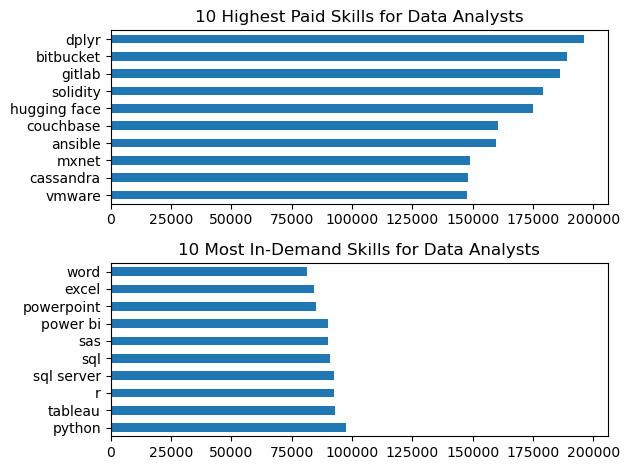

In [11]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_toppay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)

df_DA_toppay.plot(kind='barh', y = 'median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_title('10 Highest Paid Skills for Data Analysts')

df_DA_skills.plot(kind='barh', y = 'median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_title('10 Most In-Demand Skills for Data Analysts')

plt.tight_layout()
plt.show()

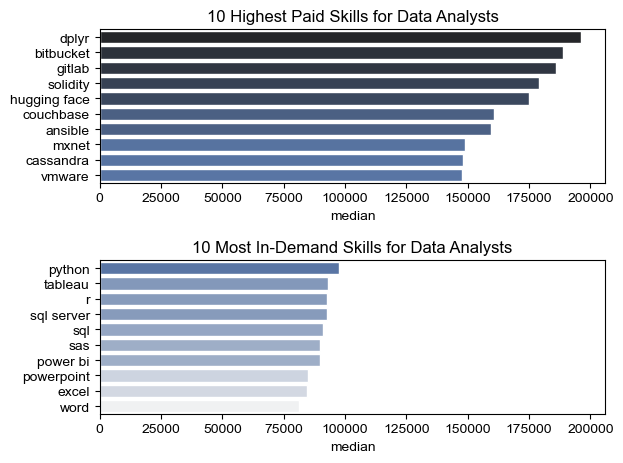

In [21]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

#df_DA_toppay.plot(kind='barh', y = 'median', ax=ax[0], legend=False)

sns.barplot(data=df_DA_toppay, x='median', y=df_DA_toppay.index, ax=ax[0], hue='median', palette='dark:b_r')

ax[0].set_ylabel('')
ax[0].set_title('10 Highest Paid Skills for Data Analysts')
ax[0].legend().remove()

#df_DA_skills.plot(kind='barh', y = 'median', ax=ax[1], legend=False)

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_title('10 Most In-Demand Skills for Data Analysts')
ax[1].legend().remove()

plt.tight_layout()
plt.show()

Text(12.444444444444445, 0.5, 'Number of Jobs')

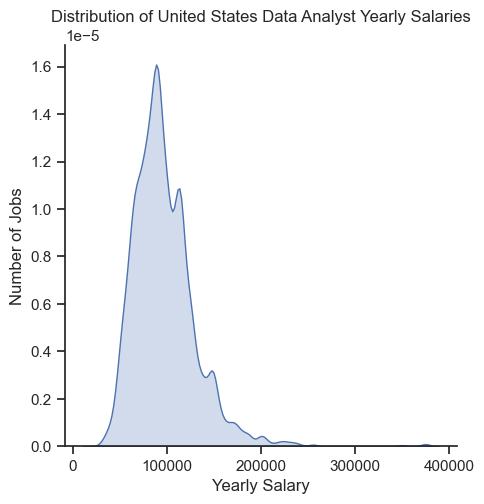

In [81]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

In [32]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

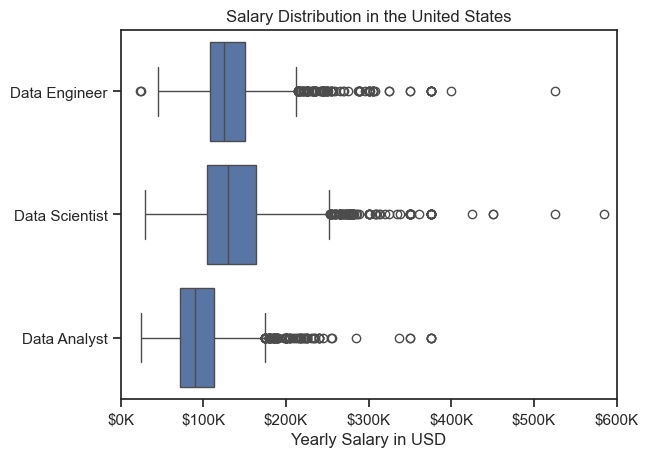

In [35]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary in USD')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [ ]:
df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

Problems

In [66]:
df_DS_US= df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()

In [72]:
top5companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().sort_values(ascending=False).head().reset_index()
top5companies

,company_name,salary_year_avg
0,ReServe,585000.0
1,"East River Electric Power Cooperative, Inc.",537000.0
2,Big Lots,375000.0
3,GM Financial,375000.0
4,Lands End,375000.0


<Axes: xlabel='salary_year_avg', ylabel='company_name'>

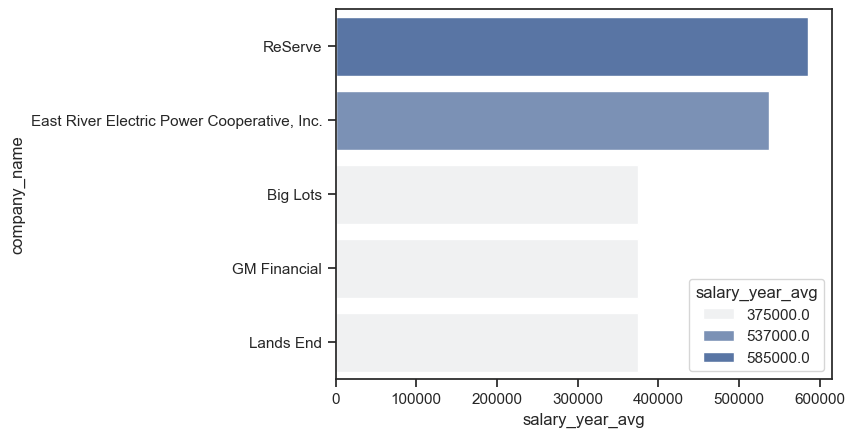

In [75]:
sns.barplot(data=top5companies, x='salary_year_avg', y='company_name', hue='salary_year_avg', palette='light:b')

In [76]:
df_DS_US= df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()

Text(0, 0.5, 'Number of Jobs')

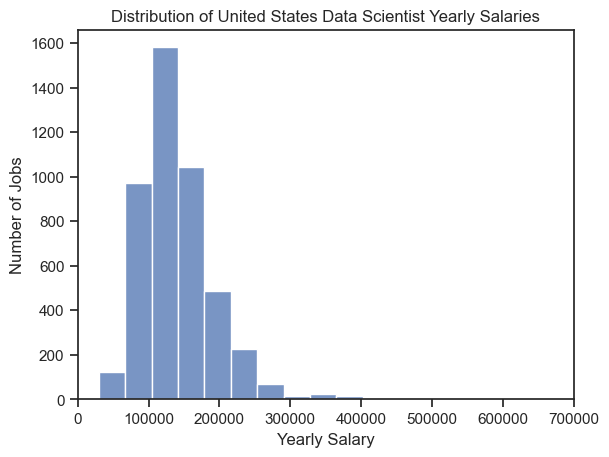

In [91]:
sns.histplot(df_DS_US['salary_year_avg'], bins=25, fill=True)

plt.xlim(0, 700000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.title('Distribution of United States Data Scientist Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

In [92]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [ ]:
df_India = df[(df['job_title_short'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])) & (df['job_country']=='India')]
df_India = df_India.dropna(subset=['salary_year_avg']).reset_index().

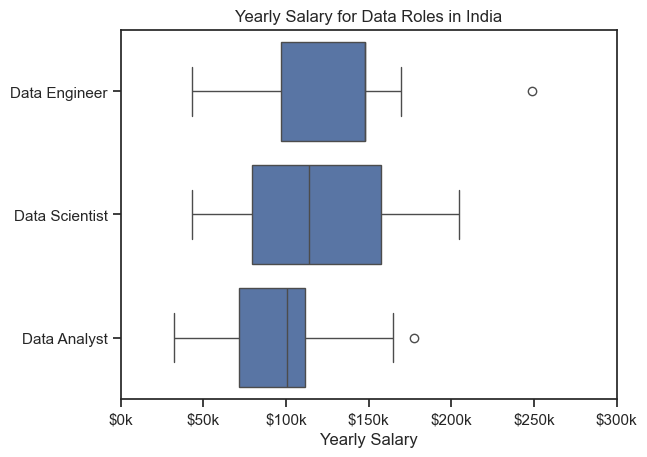

In [112]:
sns.boxplot(x = df_India['salary_year_avg'], y = df_India['job_title_short'])

plt.xlim(0, 300000)
plt.title('Yearly Salary for Data Roles in India')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

In [113]:
df_DS_US= df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()

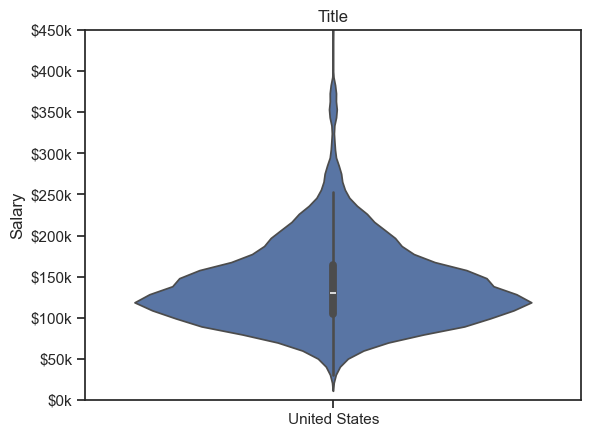

In [120]:
sns.violinplot(x= df_DS_US['job_country'], y= df_DS_US['salary_year_avg'])

plt.title('Title')
plt.xlabel('')
plt.ylabel('Salary')
plt.ylim(0, 450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.show()